Ok, so we did decision tree and then we did random forest and as expected random forest improved the accuracy so lets take it one step forward and try XG Boost

Let's import the same titanic dataset

In [1]:
import pandas as pd
# Download a sample dataset (Titanic dataset)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# XGBoost Classification on Titanic dataset

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Preprocess categorical variables using one-hot encoding
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df.dropna(subset=features + ['Survived'])
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])
X = df_encoded.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')
y = df_encoded['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

Accuracy: 0.7622377622377622
              precision    recall  f1-score   support

Not Survived       0.77      0.82      0.80        80
    Survived       0.75      0.68      0.72        63

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.76      0.76      0.76       143



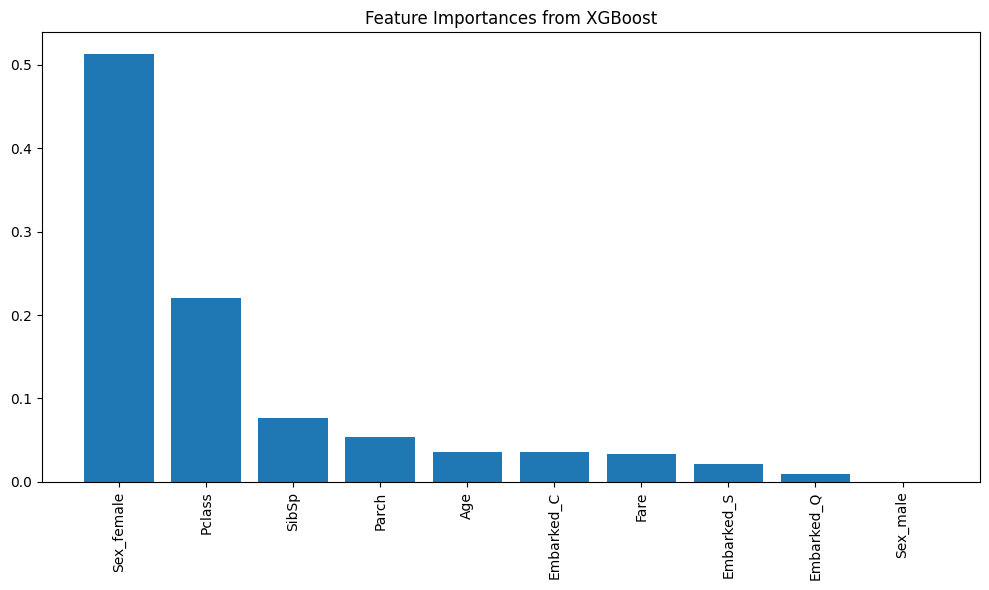

In [8]:
# Visualize feature importances from the XGBoost model
import matplotlib.pyplot as plt
import numpy as np

importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.title('Feature Importances from XGBoost')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Looks like in this dataset the random forest and XG Boost gave similar accuracy. I would personally prefer XG Boost as it is more commanly the better one in most datasets